# SOBRE
**DATASET**  
Este conjunto de dados apresenta estatísticas sobre os canais com mais inscritos no YouTube. Além disso, ele oferece um caminho perfeito para analisar e obter informações relevantes acerca dos astros da plataforma.  
Com detalhes abrangentes sobre contagens de inscritos dos principais criadores, visualizações de vídeos, frequência de upload, país de origem, ganhos e muito mais, este dataset é excelente para todo tipo de análise.  

**PROJETO**  
Este projeto visa demonstrar principalmente a distribuição dos dados, bem como a correlação entre variáveis etc.  

**VARIÁVEIS**  
**Youtuber**: Nome do canal do YouTube.  
**subscribes**: Número de inscritos no canal.  
**video views**: visualizações totais de todos os vídeos no canal.  
**category**: Categoria ou nicho do canal.  
**Title**: Título do canal do YouTube.  
**Country**: país de origem do canal do YouTube.    
**lowest_monthly_earnings**: ganhos mensais estimados mais baixos do canal.  
**highest_monthly_earnings**: ganhos mensais estimados mais altos do canal.  
**lowest_yearly_earnings**: ganhos anuais estimados mais baixos do canal.  
**highest_yearly_earnings**: ganhos anuais estimados mais altos do canal.  
**Gross tertiary education enrollment (%)**: Porcentagem da população matriculada no ensino superior no país.  
**Population**: População total do país.  
**Unemployment rate**: Taxa de desemprego no país.  
**Urban_population**: Porcentagem da população que vive em áreas urbanas.  

# PREPARAÇÃO, ORGANIZAÇÃO E ESTRUTURAÇÃO DOS DADOS

In [1]:
import pandas as pd

In [2]:
pd.set_option("display.max_columns", 28)

In [3]:
df = pd.read_csv("/content/drive/MyDrive/programacao/datasets/estatistica_global_yt/global_youtube_statistics.csv",
                 encoding="latin-1")

df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,1.0,1.0,1.0,2.258000e+09,564600.0,9000000.00,6800000.00,1.084000e+08,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,4055159.0,7670.0,7423.0,1.200000e+01,0.0,0.05,0.04,5.800000e-01,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,48.0,1.0,1.0,1.348000e+09,337000.0,5400000.00,4000000.00,6.470000e+07,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2.0,2.0,1.0,1.975000e+09,493800.0,7900000.00,5900000.00,9.480000e+07,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,3.0,2.0,2.0,1.824000e+09,455900.0,7300000.00,5500000.00,8.750000e+07,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


Primeiramente, se faz necessário saber o número de registros e variáveis no dataset.

In [4]:
df.shape

(995, 28)

Há 995 registros e 28 variáveis. Com isso, se pode analisar o tipo dos dados.

In [5]:
df.dtypes

rank                                         int64
Youtuber                                    object
subscribers                                  int64
video views                                float64
category                                    object
Title                                       object
uploads                                      int64
Country                                     object
Abbreviation                                object
channel_type                                object
video_views_rank                           float64
country_rank                               float64
channel_type_rank                          float64
video_views_for_the_last_30_days           float64
lowest_monthly_earnings                    float64
highest_monthly_earnings                   float64
lowest_yearly_earnings                     float64
highest_yearly_earnings                    float64
subscribers_for_last_30_days               float64
created_year                   

Os dados estão no formato correto. Com isso, será verificado se há valores nulos no dataframe.

In [6]:
df.isnull().sum()

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

Com isso, é possível constatar algumas variáveis com valores nulos, porém, estes não serão removidos e sim, tratados, posteriormente.  
### Variável data
Observando as variáveis, se percebe que a data está fragmentada em 3 variáveis (*created_year*, *created_month* e *created_date*). Tendo isso em mente, será criada uma nova variável para unificá-las. Para começar, a variável *created_month*, será convertida para caracter do tipo numérico.

In [7]:
df.created_month.unique()

array(['Mar', 'Feb', 'Sep', 'May', 'Apr', 'Jan', 'Dec', 'Jun', 'Aug',
       'Jul', 'Oct', 'Nov', nan], dtype=object)

In [8]:
df.created_month.replace({"Mar": 3, "Feb": 2, "Sep": 9, "May": 5, "Apr": 4,
                          "Jan": 1, "Dec": 12, "Jun": 6, "Aug": 8, "Jul": 7,
                          "Oct": 10, "Nov": 11}, inplace=True)

As variáveis que contém valores nulos devem ser analisadas, para o devido tratamento.

In [9]:
df[["created_year", "created_month", "created_date"]].isnull().sum()

created_year     5
created_month    5
created_date     5
dtype: int64

Cada variável possui 5 valores nulos. É possível verificá-los, para se ter noção sobre qual operação realizar.

In [10]:
df[df.created_year.isnull()].index

Int64Index([236, 468, 508, 735, 762], dtype='int64')

In [11]:
df[df.created_month.isnull()].index

Int64Index([236, 468, 508, 735, 762], dtype='int64')

In [12]:
df[df.created_date.isnull()].index

Int64Index([236, 468, 508, 735, 762], dtype='int64')

Observando os índices, se percebe que se tratam dos mesmos registros. Sendo assim, os valores nulos serão substituídos por zero e o tipo modificado para inteiro.

In [13]:
df["created_year"] = df.created_year.fillna(0).astype("int32")
df["created_month"] = df.created_month.fillna(0).astype("int32")
df["created_date"] = df.created_date.fillna(0).astype("int32")

Dessa forma, se vê que o tipo do dado foi modificado e os valores nulos também. Com isso, é possível criar a variável para o ano de criação (creation_date).

In [14]:
# função para gerar datas
def gerar_data(i):
    data = f"{i['created_year']}-{i['created_month']}-{i['created_date']}"
    return pd.to_datetime(data, errors="coerce")

In [15]:
df["creation_date"] = df.apply(gerar_data, axis=1)

## Remoção
 <u>**Variáveis**</u>  
 Algumas variáveis não serão necessárias, portanto, devem ser removidas.

In [16]:
df.drop(columns=["rank", "Abbreviation", "created_year", "created_month",
                 "created_date", "Latitude", "Longitude"], inplace=True)

In [17]:
df.shape

(995, 22)

<u>**Elementos**</u>  
Ao se analisar o dataframe, se percebe que alguns registros das variáveis *Youtuber* e *Title* necessitam de tratamento, pois contém caracteres especiais, que substituiram ou acrescentaram algo ao nome original. Em outra ocasião, o registro deveria ser substituído adequadamente, porém, neste caso, será feita apenas a remoção.

In [18]:
import re

In [19]:
# remove caracters não alfanuméricos
rep_non_alpha = lambda i: re.sub(r"[^a-zA-Z0-9&\s\'-.,!?]", '', i)

In [20]:
df["Youtuber"] = df.Youtuber.apply(rep_non_alpha)
df["Title"] = df.Title.apply(rep_non_alpha)

É importante verificar se, além de valores nulos, não há valores em branco.

In [21]:
sum(df["Youtuber"] == ''), sum(df["Title"] == '')

(6, 5)

Haja vista que, há valores em branco, será feita a substituição sobre os mesmo por None.

In [22]:
df["Youtuber"].replace('', None, inplace=True)
df["Title"].replace('', None, inplace=True)

In [23]:
sum(df["Youtuber"] == ''), sum(df["Title"] == '')

(0, 0)

Dessa forma, os valores foram removidos.
## Valores duplicados
Uma verificação importante é a analise de dados duplicados em determiandas variáveis de estudo.

In [24]:
df.duplicated(subset=["Youtuber", "video_views_rank", "Title"]).value_counts()

False    995
dtype: int64

Dessa forma, se constata que não há dados duplicados nas referidas variáveis de interesse.
## Reorganizando Variáveis
Primeiramente, o dataframe será organizado pelo número de inscritos (subscribers).

In [25]:
df.sort_values(by="subscribers", ascending=False, inplace=True)

Feito isso, a posição de algumas variáveis será mudada.

In [26]:
df.insert(1, "creation_date", df.pop("creation_date"))

In [27]:
df.insert(3, "Title", df.pop("Title"))

In [28]:
df.insert(4, "category", df.pop("category"))

Além disso, a variável population será modificada para o tipo inteiro.

In [29]:
df.Population = df.Population.fillna(0).astype("int32")

Por fim, todas as variáveis serão postas no mesmo padrão.

In [30]:
df.columns = df.columns.str.replace(' ', '_').str.lower()

# ESTATÍSTICA DESCRITIVA
A partir da estatística descritiva, é possível verificar a organização, descrição e representação dos dados.

## Distribuição de Frequências

### Categorias
**TOP CATEGORIAS**  
<u>Frequência absoluta</u>  
Com a frequência absoluta se sabe a quantidade de vezes que determinado valor de variável se repete, ou seja, o número de vezes que uma resposta apareceu em um conjunto de dados.

In [31]:
freq_cat = {"index": "categoria", "category": "absoluta"}

In [32]:
df_cat = df.category.value_counts().reset_index().rename(columns=freq_cat)

<u>Frequência percentual</u>  
É dada pela divisão entre a frequência absoluta e o número de dados em forma de porcentagem.

In [33]:
df_cat["percentual"] = round(df_cat.absoluta / df_cat.absoluta.sum() * 100, 2)

df_cat.head()

,categoria,absoluta,percentual
0,Entertainment,241,25.40
1,Music,202,21.29
2,People & Blogs,132,13.91
3,Gaming,94,9.91
4,Comedy,69,7.27


As categorias *Entertainment* e *Music* despontam como as mais recorrentes. Com o auxílio de um gráfico de pizza, é possível verificar como se da essa distribuição de forma percentual.

In [34]:
import plotly.graph_objects as go
import plotly.express as px

In [35]:
tema = px.colors.qualitative.Light24

Serão verificadas as top 10 categorias com mais canais no Youtube.

In [36]:
labels_cat = df_cat.categoria.values[:10]
values_cat = df_cat.absoluta.values[:10]

In [37]:
graf_cat = go.Pie(labels=labels_cat, values=values_cat, hole=0.25,
                   texttemplate="%{label}<br>%{percent}",
                   marker=dict(colors=tema))

fig_cat = go.Figure(data=graf_cat)

fig_cat.update_layout(height=650, font_size=12, showlegend=False,
                      title=dict(text="PERCENTUAL DE CATEGORIAS",
                                 x=0.5, font_size=22),
                      annotations=[dict(text=f"<b>TOTAL<br>{sum(values_cat)}</b>",
                                        x=0.5, y=0.5, font_size=14,
                                        showarrow=False)])

Assim, é possível ver claramente a distribuição percentual para cada categoria. *Entertainment*, *Music* e *People & Blogs* somam juntas mais de 50% dos dados.
Outra variável para se verificar a distribuição de frequências é a *country*, que contém o país origem de determinado canal do youtube. Com isso, seria interessante saber quais categorias possuem mais visualizações nos vídeos do Youtube.  
**VISUALIZAÇÕES x CATEGORIAS**  
É possível também verificar o top 10 categorias com mais visualizações.

In [38]:
df_cat_vis = df.groupby("category")["video_views"].sum().reset_index().sort_values(by="video_views",
                                                                                   ascending=False)

In [39]:
labels_cat_vis = df_cat_vis.category.values[:10]
values_cat_vis = df_cat_vis.video_views.values[:10]

In [40]:
graf_cat_vis = go.Pie(labels=labels_cat_vis, values=values_cat_vis, hole=0.25,
                      texttemplate="%{label}<br>%{percent}",
                      marker=dict(colors=tema))

fig_cat_vis = go.Figure(data=graf_cat_vis)

fig_cat_vis.update_layout(height=650, font_size=12, showlegend=False,
                          title=dict(text="PERCENTUAL DE VISUALIZAÇÕES POR CATEGORIA",
                                     x=0.5, font_size=22))

Ao observar o gráfico de visualizações por categoria, se observa uma inversão entre *Music* e *Entertainment*, se comparado as categorias mais recorrentes. Além disso, se percebe que *Shows* aparece no lugar de *Science & Technology*. Não obstante, o domínio permanece com Entertainment, Music e People & Blogs. Essa visualização também pode ser feita sob a perspectiva de um gráfico de barras.

In [41]:
graf_cat_vis = px.histogram(df, x="category", y="video_views", color="category",
                            color_discrete_sequence=tema, height=650,
                            text_auto=True)

graf_cat_vis.update_layout(font_size=12, yaxis=dict(title="Visualizações"),
                           title=dict(text="VISUALIZAÇÕES x CATEGORIA", x=0.5,
                                      font_size=22), showlegend=False,
                           plot_bgcolor="rgb(250, 250, 250)")

graf_cat_vis.update_xaxes(showline=True, title=None, linecolor="lightgrey",
                          linewidth=1, categoryorder="total descending")

graf_cat_vis.update_yaxes(showline=True, linewidth=1, linecolor="lightgrey")

Com isso, se tem noção do valor absoluto de visualizações por categoria.  
### Países
**CANAIS POR PAÍS**  
É interessante saber a quantidade de canais do YouTube por país.

In [42]:
freq_pais = {"index": "país", "country": "absoluta"}

In [43]:
df_pais = df.country.value_counts().reset_index().rename(columns=freq_pais)

In [44]:
df_pais["percentual"] = round((df_pais.absoluta / df_pais.absoluta.sum()) * 100, 2)

df_pais.head()

,país,absoluta,percentual
0,United States,313,35.85
1,India,168,19.24
2,Brazil,62,7.10
3,United Kingdom,43,4.93
4,Mexico,33,3.78


Com isso, se vê Estados Unidos e Índia dominando o cenário dos canais mais revelantes no youtube. A visualização do top 10 países pode ser feita a partir de um histograma.

In [45]:
graf_pais = px.histogram(df_pais[:10], x="país", y="absoluta", color="país",
                         height=650, text_auto=True, color_discrete_sequence=tema)

graf_pais.update_layout(font_size=12, yaxis=dict(title="Canais"),
                        title=dict(text="CANAIS POR PAÍS", x=0.5, font_size=22),
                        showlegend=False, plot_bgcolor="rgb(250, 250, 250)")

graf_pais.update_xaxes(showline=True, linewidth=1, linecolor="lightgrey",
                       title=None)

graf_pais.update_yaxes(showline=True, linewidth=1, linecolor="lightgrey")

O país predominante é disparado o Estados Unidos, após, se tem India com pouco mais da metade. Tendo conhecimento acerca dos países com maior número de canais, é interessante saber quais são os youtubers mais relevantes em relação a seus países.  
**VISUALIZAÇÕES POR PAÍS**  
Além de saber os países com mais canais relevantes no Youtube, é interessante saber a quantidade de visualizações por país.

In [46]:
df_pais_vis = df.groupby("country")["video_views"].sum().reset_index()

In [47]:
df_pais_vis.sort_values(by="video_views", ascending=False, inplace=True)

In [48]:
df_pais_vis["percentual"] = round((df_pais_vis.video_views / df_pais_vis.video_views.sum()) * 100, 2)

df_pais_vis.head()

,country,video_views,percentual
46,United States,3.690292e+12,37.66
18,India,2.281048e+12,23.28
6,Brazil,4.812090e+11,4.91
45,United Kingdom,4.305665e+11,4.39
41,Thailand,2.643180e+11,2.70


Com isso, se observa a predominância de Estados Unidos e India em visualizações, com mais de 60% do total de visualizações. Dessa forma, será visto o top 10 países.

In [49]:
graf_vis_pais = px.histogram(df_pais_vis[:10], x="country", y="video_views",
                             color="country", height=650, text_auto=True,
                             color_discrete_sequence=tema)

graf_vis_pais.update_layout(font_size=12, yaxis=dict(title="Visualizações"),
                            title=dict(text="VISUALIZAÇÕES POR PAÍS", x=0.5,
                                       font_size=22), showlegend=False,
                            plot_bgcolor="rgb(250, 250, 250)")

graf_vis_pais.update_xaxes(showline=True, linewidth=1, linecolor="lightgrey",
                           title=None)

graf_vis_pais.update_yaxes(showline=True, linewidth=1, linecolor="lightgrey")

A visualização em escala parece não ser grande, porém, a diferença esmagadora no consumo de visualizações em vídeos entre Estados Unidos e India se dá nos números na casa dos trilhões, com mais de um trilhão de diferença. A mesma se torna ainda mais exorbitante quando se trata dos demais países.  
### Youtubers
As análises são feitas sobre canais do Youtube, portanto, nada mais importante do que se ter conhecimento quais são os canais mais relevantes acerca do mesmo.

In [50]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [51]:
top_canal = dict(zip(df["youtuber"], df["subscribers"]))

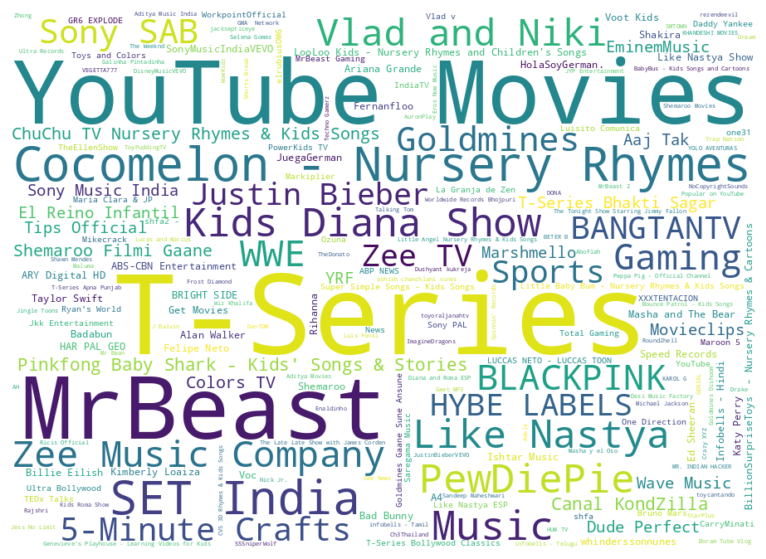

In [52]:
wordcloud = WordCloud(width=900, height=650,
                      background_color="white").generate_from_frequencies(top_canal)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off"); # Remove os eixos

Esta é uma bela visualização sobre os Youtubers mais relevantes do mundo, contudo, é possível fazer a mesma de maneira estatística, com um gráfico de barras.

In [53]:
graf_top_yt = px.histogram(df[:11], x="youtuber", y="subscribers", height=650,
                           color="country", text_auto=True,
                           color_discrete_sequence=tema)

graf_top_yt.update_layout(font_size=12, yaxis=dict(title="Inscritos"),
                          title=dict(text="TOP YOUTUBERS",
                                     x=0.5, font_size=22), showlegend=False,
                          plot_bgcolor="rgb(250, 250, 250)")

graf_top_yt.update_xaxes(showline=True, title=None, linecolor="lightgrey",
                          linewidth=1, categoryorder="total descending")

graf_top_yt.update_yaxes(showline=True, linewidth=1, linecolor="lightgrey")

Ao observar o gráfico, se constata que 8 dos top 10 Youtubers são dos países com maior número de youtubers relevantes, com excessão de dois.
# ESTATÍSTICA INFERENCIAL
Utiliza uma amostra aleatória dos dados coletados de uma população para descrever e fazer inferências sobre a mesma.

## Correlação Linear
Também chamado de r de Pearson, é um grau de relação entre duas variáveis quantitativas e exprime o grau de correlação através de valores situados entre -1 e 1. Quando o coeficiente de correlação se aproxima de 1, nota-se um aumento no valor de uma variável quando a outra também aumenta, ou seja, há uma **relação linear positiva**. Quando o coeficiente se aproxima de -1, também é possível dizer que as variáveis são correlacionadas, mas nesse caso quando o valor de uma variável aumenta o da outra diminui. Isso é o que é chamado de **correlação negativa** ou inversa.

### Mapa de calor
Com o mapa de calor, é possível visualizar de forma lúdica a correlação entre as variáveis.

In [54]:
df_corr = df.corr(method="pearson", numeric_only=True)

In [55]:
mapa_calor = px.imshow(df_corr, text_auto=True)

mapa_calor.update_layout(height=1000, plot_bgcolor="rgb(250, 250, 250)")

mapa_calor.update_xaxes(showline=True, linewidth=1, linecolor="lightgrey")

mapa_calor.update_yaxes(showline=True, linewidth=1, linecolor="lightgrey")

Observando o mapa, é possível constatar diversas correlações, de positivas a negativas. Com isso, será feita a contagem, para uma melhor noção do resultado.
### Positiva
Correlação linear positiva indica que uma variável tende a aumentar enquanto a outra aumenta. Sabendo disso, será feita a análise de correlações positivas **muito forte** (acima de 0,95).

In [56]:
corr_pos = df_corr.values

In [57]:
import numpy as np

In [58]:
# registros e variáveis à correlação
reg_pos, var_pos = np.where((corr_pos >= 0.8) & (np.arange(corr_pos.shape[0])[:, np.newaxis] !=
                                                  np.arange(corr_pos.shape[1])[np.newaxis, :]))

In [59]:
x_pos = df_corr.index[reg_pos]
y_pos = df_corr.columns[var_pos]

In [60]:
df_corr_pos = pd.DataFrame({'x': x_pos, 'y': y_pos})

In [61]:
df_corr_pos["sort"] = df_corr_pos.apply(lambda row: tuple(sorted([row['x'],
                                                                  row['y']])),
                                        axis=1)

In [62]:
# Remover duplicatas com base na nova coluna
df_corr_pos.drop_duplicates(subset="sort", inplace=True)

df_corr_pos.drop(columns="sort", inplace=True)

df_corr_pos.reset_index(drop=True, inplace=True)

df_corr_pos

,x,y
0,video_views_rank,country_rank
1,video_views_rank,channel_type_rank
2,country_rank,channel_type_rank
3,lowest_monthly_earnings,highest_monthly_earnings
4,lowest_monthly_earnings,lowest_yearly_earnings
5,lowest_monthly_earnings,highest_yearly_earnings
6,highest_monthly_earnings,lowest_yearly_earnings
7,highest_monthly_earnings,highest_yearly_earnings
8,lowest_yearly_earnings,highest_yearly_earnings
9,population,urban_population


Ao término desta operação, se conhece que há 6 correlações positivas igual ou acima de muito forte. Sendo estas entre:
rendimentos mensais mais baixos (lowest_monthly_earnings), rendimentos mensais mais elevados (highest_monthly_earnings), rendimentos anuais mais baixos (lowest_yearly_earnings) e rendimentos anuais mais elevados (highest_yearly_earnings).

In [63]:
df_corr_pos

,x,y
0,video_views_rank,country_rank
1,video_views_rank,channel_type_rank
2,country_rank,channel_type_rank
3,lowest_monthly_earnings,highest_monthly_earnings
4,lowest_monthly_earnings,lowest_yearly_earnings
5,lowest_monthly_earnings,highest_yearly_earnings
6,highest_monthly_earnings,lowest_yearly_earnings
7,highest_monthly_earnings,highest_yearly_earnings
8,lowest_yearly_earnings,highest_yearly_earnings
9,population,urban_population


In [64]:
# função para concatenar o título do gráfico
def conc_t(df, i):
    titulo = f"{df['x'][i]} x {df['y'][i]}: "
    val_corr = f"{round(df_corr[df['x'][i]][df['y'][i]], 2)}"
    return titulo + val_corr

In [65]:
corr_pos0 = px.scatter(data_frame=df, height=650, x=df_corr_pos['x'][0],
                       y=df_corr_pos['y'][0], log_x=True, log_y=True)

corr_pos0.update_layout(font_size=12, xaxis=dict(title=df_corr_pos['x'][0]),
                        yaxis=dict(title=df_corr_pos['y'][0]), showlegend=False,
                        title=dict(text=conc_t(df_corr_pos, 0), x=0.5,
                                   font_size=22),
                        plot_bgcolor="rgb(245, 245, 245)")

In [66]:
corr_pos1 = px.scatter(data_frame=df, height=650, x=df_corr_pos['x'][1],
                       y=df_corr_pos['y'][1], log_x=True, log_y=True)

corr_pos1.update_layout(font_size=12, xaxis=dict(title=df_corr_pos['x'][1]),
                        yaxis=dict(title=df_corr_pos['y'][1]), showlegend=False,
                        title=dict(text=conc_t(df_corr_pos, 1), x=0.5,
                                   font_size=22),
                        plot_bgcolor="rgb(245, 245, 245)")

In [67]:
corr_pos2 = px.scatter(data_frame=df, height=650, x=df_corr_pos['x'][2],
                       y=df_corr_pos['y'][2], log_x=True, log_y=True)

corr_pos2.update_layout(font_size=12, xaxis=dict(title=df_corr_pos['x'][2]),
                        yaxis=dict(title=df_corr_pos['y'][2]), showlegend=False,
                        title=dict(text=conc_t(df_corr_pos, 2), x=0.5,
                                   font_size=22),
                        plot_bgcolor="rgb(245, 245, 245)")

In [68]:
corr_pos3 = px.scatter(data_frame=df, height=650, x=df_corr_pos['x'][3],
                       y=df_corr_pos['y'][3], log_x=True, log_y=True)

corr_pos3.update_layout(font_size=12, xaxis=dict(title=df_corr_pos['x'][3]),
                        yaxis=dict(title=df_corr_pos['y'][3]), showlegend=False,
                        title=dict(text=conc_t(df_corr_pos, 3), x=0.5,
                                   font_size=22),
                        plot_bgcolor="rgb(245, 245, 245)")

In [69]:
corr_pos4 = px.scatter(data_frame=df, height=650, x=df_corr_pos['x'][4],
                       y=df_corr_pos['y'][4], log_x=True, log_y=True)

corr_pos4.update_layout(font_size=12, xaxis=dict(title=df_corr_pos['x'][4]),
                        yaxis=dict(title=df_corr_pos['y'][4]), showlegend=False,
                        title=dict(text=conc_t(df_corr_pos, 4), x=0.5, font_size=22),
                        plot_bgcolor="rgb(245, 245, 245)")

In [70]:
corr_pos5 = px.scatter(data_frame=df, height=650, x=df_corr_pos['x'][5],
                       y=df_corr_pos['y'][5], log_x=True, log_y=True)

corr_pos5.update_layout(font_size=12, xaxis=dict(title=df_corr_pos['x'][5]),
                        yaxis=dict(title=df_corr_pos['y'][5]), showlegend=False,
                        title=dict(text=conc_t(df_corr_pos, 5), x=0.5,
                                   font_size=22),
                        plot_bgcolor="rgb(245, 245, 245)")

In [71]:
corr_pos6 = px.scatter(data_frame=df, height=650, x=df_corr_pos['x'][6],
                       y=df_corr_pos['y'][6], log_x=True, log_y=True)

corr_pos6.update_layout(font_size=12, xaxis=dict(title=df_corr_pos['x'][6]),
                        yaxis=dict(title=df_corr_pos['y'][6]), showlegend=False,
                        title=dict(text=conc_t(df_corr_pos, 6), x=0.5,
                                   font_size=22),
                        plot_bgcolor="rgb(245, 245, 245)")

In [72]:
corr_pos7 = px.scatter(data_frame=df, height=650, x=df_corr_pos['x'][7],
                       y=df_corr_pos['y'][7], log_x=True, log_y=True)

corr_pos7.update_layout(font_size=12, xaxis=dict(title=df_corr_pos['x'][7]),
                        yaxis=dict(title=df_corr_pos['y'][7]), showlegend=False,
                        title=dict(text=conc_t(df_corr_pos, 7), x=0.5,
                                   font_size=22),
                        plot_bgcolor="rgb(245, 245, 245)")

In [73]:
corr_pos8 = px.scatter(data_frame=df, height=650, x=df_corr_pos['x'][8],
                       y=df_corr_pos['y'][8], log_x=True, log_y=True)

corr_pos8.update_layout(font_size=12, xaxis=dict(title=df_corr_pos['x'][8]),
                        yaxis=dict(title=df_corr_pos['y'][8]), showlegend=False,
                        title=dict(text=conc_t(df_corr_pos, 8), x=0.5,
                                   font_size=22),
                        plot_bgcolor="rgb(245, 245, 245)")

In [74]:
corr_pos9 = px.scatter(data_frame=df, height=650, x=df_corr_pos['x'][9],
                       y=df_corr_pos['y'][9], log_x=True, log_y=True)

corr_pos9.update_layout(font_size=12, xaxis=dict(title=df_corr_pos['x'][9]),
                        yaxis=dict(title=df_corr_pos['y'][9]), showlegend=False,
                        title=dict(text=conc_t(df_corr_pos, 9), x=0.5,
                                   font_size=22),
                        plot_bgcolor="rgb(245, 245, 245)")

### Negativa
Correlação linear negativa indica que uma variável tende a diminuir quando a outra aumenta.

In [75]:
corr_neg = df_corr.values

Para a correlação negativa, será usada acima moderada.

In [76]:
reg_neg, var_neg = np.where((corr_neg >= -1) & (corr_neg <= -0.5) &
                            (np.arange(corr_neg.shape[0])[:, np.newaxis] !=
                             np.arange(corr_neg.shape[1])[np.newaxis, :]))

In [77]:
x_neg = df_corr.index[reg_neg]
y_neg = df_corr.columns[var_neg]

In [78]:
df_corr_neg = pd.DataFrame({'x': x_neg, 'y': y_neg}).sort_values(by='x')

In [79]:
df_corr_neg["sort"] = df_corr_neg.apply(lambda row: tuple(sorted([row['x'],
                                                                  row['y']])),
                                        axis=1)

In [80]:
# Remover duplicatas com base na nova coluna
df_corr_neg.drop_duplicates(subset="sort", inplace=True)

df_corr_neg.drop(columns="sort", inplace=True)

df_corr_neg.reset_index(drop=True, inplace=True)

df_corr_neg

,x,y
0,gross_tertiary_education_enrollment_(%),population


Ao passo que há diversas correlações positivas acima de forte, se percebe apenas uma para as negativas, a saber entre *Matrícula bruta no ensino superior (%)* (gross_tertiary_education_enrollment_(%)) e *população* (population). Com isso, será visualizada a única correlação linear negativa acima de moderada.

In [81]:
# normalizar o tamanho da população
pop_norm = (df.population - min(df.population)) / (max(df.population) - min(df.population))

In [82]:
tam_min = 1
tam_max = 60

In [83]:
# ajuste dos tamanhos com base nos dados normalizados
pop_ajust = tam_min + (tam_max - tam_min) * pop_norm

In [84]:
corr_neg = px.scatter(data_frame=df, height=650, x=df_corr_neg['x'][0],
                       y=df_corr_neg['y'][0], log_x=True, log_y=True,
                       color_discrete_sequence=tema, color="country",
                       size_max=tam_max, size=pop_ajust)

corr_neg.update_layout(font_size=12, xaxis=dict(title=df_corr_neg['x'][0]),
                        yaxis=dict(title=df_corr_neg['y'][0]), showlegend=False,
                        title=dict(text=conc_t(df_corr_neg, 0), x=0.5,
                                   font_size=22),
                        plot_bgcolor="rgb(245, 245, 245)")

Olhando para o gráfico, se percebe que a correlação é praticamente imperceptível. O que se pode entender é que, o tamanho da população nem sempre está ligado ao grau da Matrícula bruta no ensino superior.
# CONCLUSÃO
É possível se tirar algumas conclusões sobre o estudo.  
1\. Entretenimento e Música são as categorias de canais mais recorrentes entre os maiores canais do mundo e isto não muda quando se trata de visualizações por categoria, elas se mantém dominando o cenário.  
2\. Ao se olhar para a quantidade canais relevantes por país, é possível observar o domínio dos Estados Unidos, seguido por India com pouco mais da metade de canais. Sito se reflete na quantidade de visualizações, cujo estes países mantém predominância isolada. Além disso, isto se reflete aos canais mais bem-sucedidos do Youtube, onde 8 dos 10 canais mais relevantes são destes países.  
Além dessas observações, outros tipos de análises poderiam ser feitas, porém, estas fogem ao escopo do projeto. Contudo, é possível se tirar boas conclusões observando as informações apresentadas, correlações etc.